In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

plt.rcParams["patch.force_edgecolor"] = True

In [28]:
df = pd.read_csv('Classified Data')

In [29]:
df.tail(5)


,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1
999,999,0.837460,0.961184,0.417006,0.799784,0.934399,0.424762,0.778234,0.907962,1.257190,1.364837,1


In [30]:
df.describe()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,288.819436,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.000000,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,249.750000,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,499.500000,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,749.250000,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,999.000000,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [8]:
df['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Unnamed: 0      1000 non-null int64
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(2)
memory usage: 93.8 KB


In [31]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [36]:
scaler.fit(df.iloc[:,0:10])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
scaled_features = scaler.transform(df.iloc[:,0:10])

In [22]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [39]:
df_scaled = pd.DataFrame(scaled_features, columns=['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'])

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
 X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['TARGET CLASS'], test_size=0.3, random_state=101)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)

In [46]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [47]:
y_pred = knn.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [50]:
print(confusion_matrix(y_test, y_pred))

[[151   8]
 [ 15 126]]


In [58]:
err_rates= []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train)
    i_pred = knn.predict(X_test)
    err_rates.append(np.mean(i_pred  != y_test))

In [53]:
err_rates

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05]

Text(0.5,1,'K VS. Error Rates')

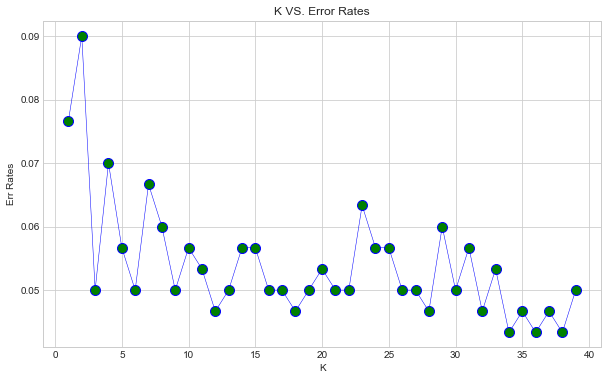

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), err_rates, color='blue', ls='-', lw=0.5, marker='o', markerfacecolor='g', markersize=10)
plt.xlabel('K')
plt.ylabel('Err Rates')
plt.title('K VS. Error Rates')

In [61]:
knn = KNeighborsClassifier(n_neighbors=17) 
knn.fit(X_train, y_train)
y_pred_2 = knn.predict(X_test)


print(classification_report(y_test, y_pred_2))
print('\n')
print(confusion_matrix(y_test, y_pred_2))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95       159
          1       0.96      0.94      0.95       141

avg / total       0.95      0.95      0.95       300



[[153   6]
 [  9 132]]
